## Machine Learning IPN - Trabajo 24 marzo 2021
Mario Alberto Ponce Pacheco

## Ejercicios - Redes neuronales
1. Continua el estudio de clase para el reconocimiento de dígitos de notebooks/12. Multilayer Neural Network Classifier.ipynb.

In [5]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

train_labels_path = "datasets/mnist/train-labels-idx1-ubyte.gz"

with gzip.open(train_labels_path, "rb") as data:
    train_labels = np.frombuffer(data.read(), dtype=np.uint8, offset=8)

train_images_path = "datasets/mnist/train-images-idx3-ubyte.gz"

with gzip.open(train_images_path, "rb") as data:
    train_images = np.frombuffer(data.read(), dtype=np.uint8, offset=16).reshape(len(train_labels), 784) # 28x28 = 784

test_labels_path = "datasets/mnist/t10k-labels-idx1-ubyte.gz"

with gzip.open(test_labels_path, "rb") as data:
    test_labels = np.frombuffer(data.read(), dtype=np.uint8, offset=8)

test_images_path = "datasets/mnist/t10k-images-idx3-ubyte.gz"

with gzip.open(test_images_path, "rb") as data:
    test_images = np.frombuffer(data.read(), dtype=np.uint8, offset=16).reshape(len(test_labels), 784)

def enconder(digit):
    if digit == 0:
        return [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif digit == 1:
        return [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    elif digit == 2:
        return [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    elif digit == 3:
        return [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    elif digit == 4:
        return [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    elif digit == 5:
        return [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    elif digit == 6:
        return [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
    elif digit == 7:
        return [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    elif digit == 8:
        return [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    elif digit == 9:
        return [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
    else:
        return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

train_labels_enc = np.array(list(map(enconder, train_labels)))
test_labels_enc = np.array(list(map(enconder, test_labels)))

In [6]:
# Tres capas ocultas de 20-150-20 neuronas respectivamente
clf = MLPClassifier(hidden_layer_sizes=(20,))
clf.fit(train_images, train_labels_enc)

D:\Users\mapp2\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20,))

In [7]:
clf.score(test_images, test_labels_enc)

0.8437

2. Dibuja en paint un dígito a mano y guardalo como una imagen PNG.
3. Abre la imagen en Python con Pillow. Pista https://www.geeksforgeeks.org/python-pil-image-resize-method/

In [21]:
from PIL import Image 
from skimage.color import rgb2gray
import numpy as np

im = Image.open(r"datasets/myNumber.png")

4. Escala la imagen a 28x28 pixeles.

In [22]:
im = im.resize((28, 28))

5. Convierte la imagen a un array de numpy. Pista https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/

In [23]:
im = np.asarray(im)

6. Usa rgb2gray de skimage para convertir la imagen de RGB a escala de grises. https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html#sphx-glr-auto-examples-color-exposure-plot-rgb-to-gray-py

In [24]:
im = 1 - rgb2gray(im)

7. Refigura la imagen para que sea un vector de 768 entradas.

In [25]:
im  = im.reshape((784, ))

8. Predice que dígito responde el clasificador y comenta si funcionó o se equivocó.

[[0 0 0 0 0 0 0 0 0 1]]


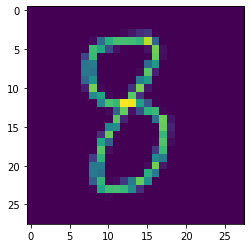

In [26]:
print(clf.predict([ im ]))
plt.imshow(im.reshape((28, 28)))

La predicción fue 9 cuando el número claramente es 8. Se equivocó. Posiblemente haga falta más entrenamiento.